# Implement the ML Models

Data Preparation

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example dataset (use your CSV file instead)
df = pd.read_csv("C:/Users/KAVYA/Documents/Greenskills/soil_heavy_metal_dataset.csv")

# Encode categorical column 'Soil_Type'
le = LabelEncoder()
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])

# Define features and target
features = ['Ni','Pb','Cr','Hg','Cd','As','Cu','Zn','Soil_Type','Sample_Depth_cm']
X = df[features]
y = df['Contamination_Level']

# Encode target (Low=0, Moderate=1, High=2, etc.)
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train Models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# Evaluate the Models

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)


Model: Logistic Regression
Accuracy: 0.965
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.94      0.97        31
           2       0.96      1.00      0.98       164

    accuracy                           0.96       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.94      0.96      0.95       200

Confusion Matrix:
 [[  0   0   5]
 [  0  29   2]
 [  0   0 164]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.68      0.81        31
           2       0.92      1.00      0.96       164

    accuracy                           0.93       200
   macro avg       0.64      0.56      0.59       200
weighted avg       0.91      0.93      0.91      

C:\Users\KAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KAVYA\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [7]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Load Dataset
df = pd.read_csv("C:/Users/KAVYA/Documents/Greenskills/soil_heavy_metal_dataset.csv")

# 3. Handle Missing Values
# Check for null values
print(df.isnull().sum())

# Fill or drop missing values if any
df.fillna(df.mean(numeric_only=True), inplace=True)   # for numeric cols
df['Soil_Type'].fillna(df['Soil_Type'].mode()[0], inplace=True)  # for categorical

# 4. Encode Categorical Variables
# Soil_Type is categorical -> Encode it
label_encoder = LabelEncoder()
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])

# 5. Feature Selection (drop unnecessary columns)
features = ['Latitude','Longitude','Sample_Depth_cm','Soil_Type',
            'Ni','Pb','Cr','Hg','Cd','As','Cu','Zn']

X = df[features]
y = df['Contamination_Level']

# 6. Encode Target Variable (if needed for ML models)
y = label_encoder.fit_transform(y)   # Low=1, Moderate=2, etc.

# 7. Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Create Final Preprocessed DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(X_scaled_df.head())


Location_ID            0
Latitude               0
Longitude              0
Sample_Depth_cm        0
Soil_Type              0
Ni                     0
Pb                     0
Cr                     0
Hg                     0
Cd                     0
As                     0
Cu                     0
Zn                     0
Contamination_Level    0
dtype: int64
   Latitude  Longitude  Sample_Depth_cm  Soil_Type        Ni        Pb  \
0  0.809919   1.084476         0.345942  -0.464555 -1.699342 -0.159972   
1  0.331364   0.977469         0.081730  -0.464555 -0.174818 -1.029054   
2  0.288378  -0.689284         1.226650  -0.464555 -0.193859 -1.121154   
3  0.027630  -1.099786         0.522083  -1.364856  0.742218 -0.797381   
4  0.843804   1.117340         0.786296  -1.364856 -0.540762  0.906909   

         Cr        Hg        Cd        As        Cu        Zn  
0  0.438249  1.627901  1.290274  0.756866 -1.156289 -0.897943  
1  1.707255 -0.457102  1.050766 -1.036173  0.836309  1.220268  


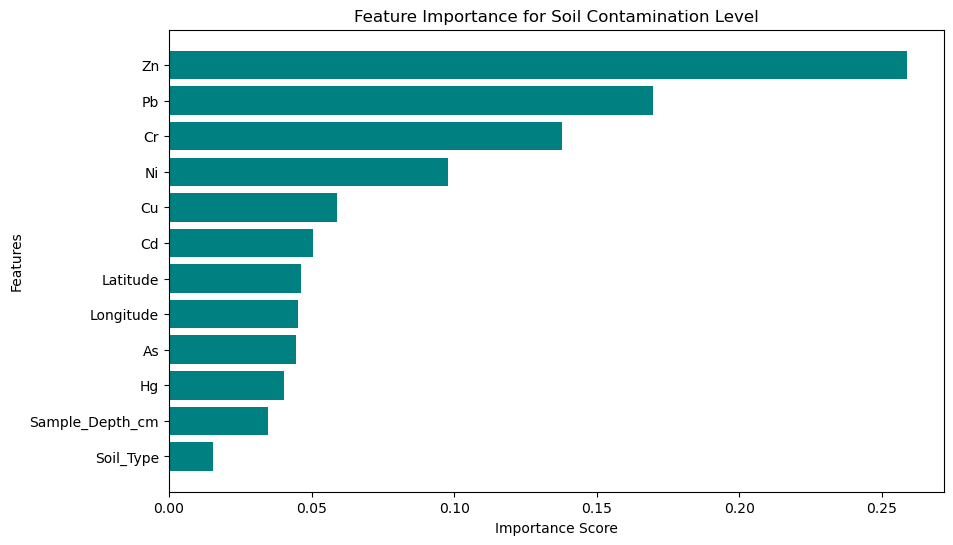

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X_scaled_df (features) and y (encoded contamination levels) are ready

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled_df, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_scaled_df.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Soil Contamination Level")
plt.gca().invert_yaxis()
plt.show()
